# Training of Models with Helen*

> DS taken from: "https://github.com/JPlin/Relabeled-HELEN-Dataset"


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Read dataset from disk to RAM

In [ ]:
import cv2
import glob
import torch
import numpy as np
import os

#Resize images (height  = X, width = Y)
SIZE_X = 256 
SIZE_Y = 256
#Ensure MLP Is only fed 1000/ Dataset
SAMPLE_SIZE = 2000

"""IMG"""
#Capture training image info as a list
train_images = []
count = 0
for img_path in sorted(glob.glob(os.path.join("/content/drive/MyDrive/helenstar_release/train/", "*image.jpg"))):
    count += 1
    #Process images
    img = cv2.imread(img_path)
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
    #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #train_images.append(img)
    
    # convert to gray
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # blur
    smooth = cv2.GaussianBlur(gray, (95,95), 0)

    # divide gray by morphology image
    division = cv2.divide(gray, smooth, scale=192)
    train_images.append(division)
    

    # Stop after SAMPLE_SIZE is reached
    print(str(count), "/", "1000")
    if count > SAMPLE_SIZE:
      break

# Conver to Torch Tensor
train_images = torch.tensor(train_images)


"""MASK"""
#Capture mask/label info as a list
train_masks = [] 
count=0
for mask_path in sorted(glob.glob(os.path.join("/content/drive/MyDrive/helenstar_release/train/", "*label.png"))):
    count += 1
    #Process images
    mask = cv2.imread(mask_path, 0)    
    mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
    train_masks.append(mask)   

    # Stop after SAMPLE_SIZE is reached
    print(str(count), "/", "1000")
    if count > SAMPLE_SIZE:
      break



# Conver to Torch Tensor
train_masks = torch.tensor(train_masks)

#Use customary x_train and y_train variables
X = train_images
Y = train_masks

print(X.shape)
print(Y.shape)

1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 / 1000
81 / 1000
82 / 1000
83 / 1000
84 / 1000
85 / 1000
86 / 1000
87 / 1000
88 / 1000
89 / 1000
90 / 1000
91 / 1000
92 / 1000
93 / 1000
94 / 1000
95 / 1000
96 / 1000
97 / 1000
98 / 1000
99 / 1000
100 / 1000
101 / 10

### Obtain semantic class values for facial features in the dataset's images

0: background
1: facial skin
2: left brow (viewer side)
3: right brow
4: left eye
5: right eye
6: nose
7: upper lip
8: inner mouth
9: lower lip
10: hair

In [ ]:
rgb_vals = np.unique(ar = Y.numpy())
print(rgb_vals)

num_classes=len(rgb_vals)

[ 0  1  2  3  4  5  6  7  8  9 10]


### Sanity Check

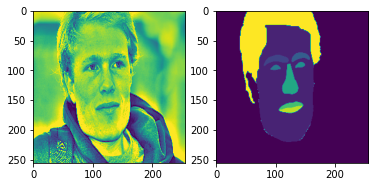

torch.Size([1999, 256, 256])
torch.Size([1999, 256, 256])


In [ ]:
from matplotlib import pyplot as plt

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(X[0])
f.add_subplot(1,2, 2)
plt.imshow(Y[0])
plt.show(block=True)

print(X.shape)
print(Y.shape)

## Augmentations

In [ ]:
import torchvision.transforms as T
import torchvision.transforms.functional as F
import random

def augment(x,y):
    # rotate XY
    r = random.randint(-18,18)
    x = F.rotate(x, r)
    y = F.rotate(y, r)

    # persepective warp XY with percentage: 40% WARP
    prob_warp = random.randint(0,10)
    starting_coords = [[0,SIZE_Y],[SIZE_X,SIZE_Y], [0,0], [SIZE_X,0]]
    end_coords = starting_coords
    if prob_warp > 7:
      
      for coord in end_coords:
        for val in coord:
          transformation = random.random()
          val = val * transformation

      x, y = F.perspective(x, starting_coords, end_coords), F.perspective(y, starting_coords, end_coords)

    # (Gaussian) blurs XY with percentage: 30% BLUR
    prob_blur = random.randint(0,10)
    if prob_blur > 0.7:
      blurrer = T.GaussianBlur(kernel_size=(3,5))
      x, y = blurrer(x), blurrer(y)

    #modulations to brightness and contrast X with percentage: 30% MODULATION
    prob_mod = random.randint(0,10)
    if prob_mod > 0.7:
      jitter = T.ColorJitter()
      x = jitter(x)
    
    #modulations to brightness and contrast X with percentage: 30% MODULATION
    prob_mod = random.randint(0,10)
    if prob_mod > 0.7:
      x = F.hflip(x)
      y = F.hflip(y)

  #conversion to grayscale X
    return x,y

## One hot encode

In [ ]:
one_hot_Y = torch.nn.functional.one_hot(Y.to(torch.int64), num_classes)
X = X.unsqueeze(1).float()
Y = one_hot_Y.permute(0, 3, 1, 2).float()

print(X.shape)
print(Y.shape)

torch.Size([1999, 256, 256, 11])
torch.Size([1999, 1, 256, 256])
torch.Size([1999, 11, 256, 256])


### Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

print(x_train.shape)
print(y_train.shape)

torch.Size([1599, 1, 256, 256])
torch.Size([1599, 11, 256, 256])


## Visualisation and accessory encoder functions

In [ ]:
# Helper functions from "https://github.com/HardevKhandhar/building-segmentation-image-processing/blob/main/geospatial_buildings.ipynb"

# helper function for data visualization
def visualize(**images):
    """
    Plot images in one row (Original Image: Ground Truth : Predicted)
    """
    n_images = len(images)
    plt.figure(figsize=(20,8))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); 
        plt.yticks([])
        # get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(image)
    plt.show()

#Function to reverse one-hot-encode an image
def reverse_one_hot(image):
    """
    Transform a 2D array in one-hot format (depth is num_classes),
    to a 2D array with only 1 channel, where each pixel value is
    the classified class key.
    # Arguments
        image: The one-hot format image 
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of 1, where each pixel value is the classified 
        class key.
    """
    #argmax to return the indices of the maximum values along an axis. 
    x = np.argmax(image, axis = -3)
    return x

# Perform colour coding on the reverse-one-hot outputs
def colour_code_segmentation(image, label_values):
    """
    Given a 1-channel array of class keys, colour code the segmentation results.
    # Arguments
        image: single channel array where each value represents the class key.
        label_values

    # Returns
        Colour coded image for segmentation visualization
    """
    colour_codes = np.array(label_values)
    x = colour_codes[image.numpy().astype(int)]

    return x

### Sanity check

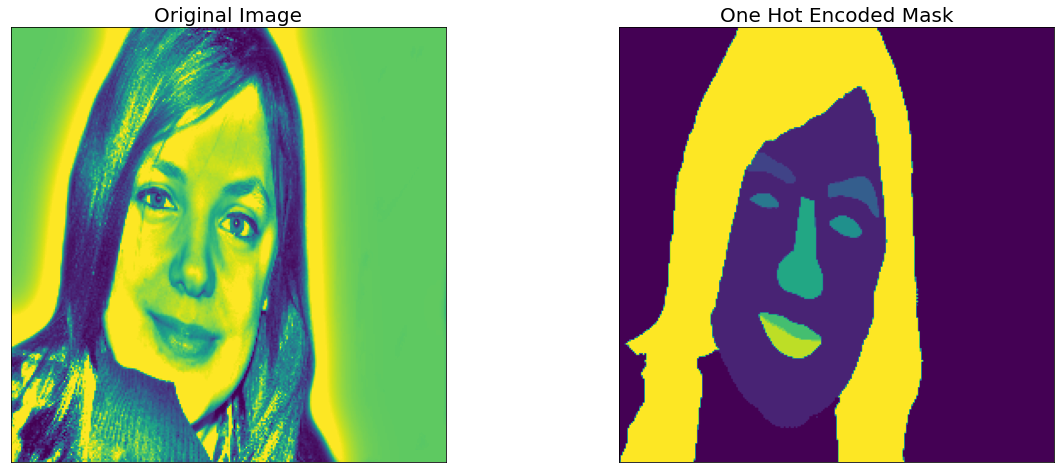

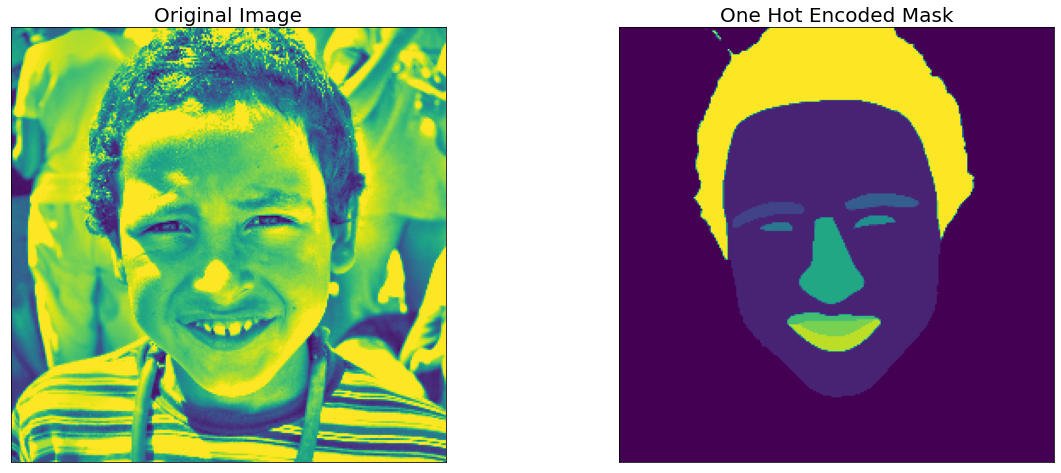

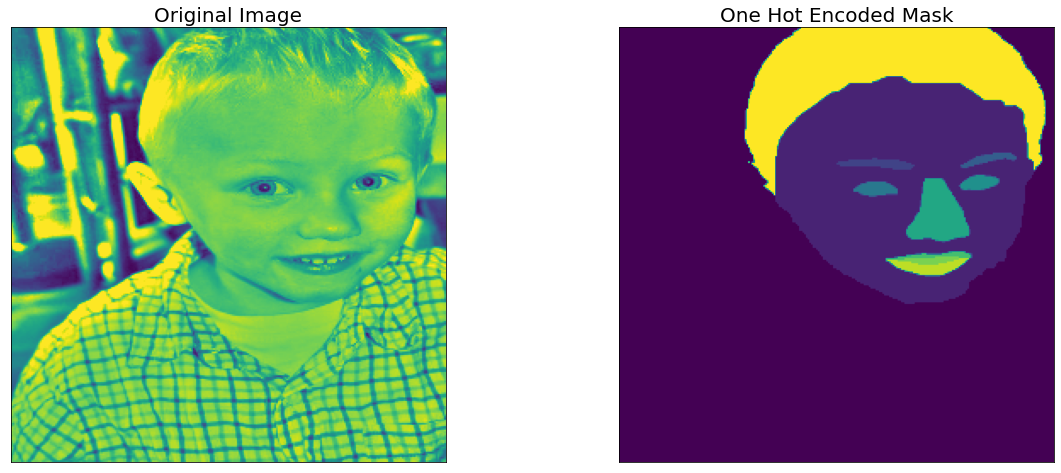

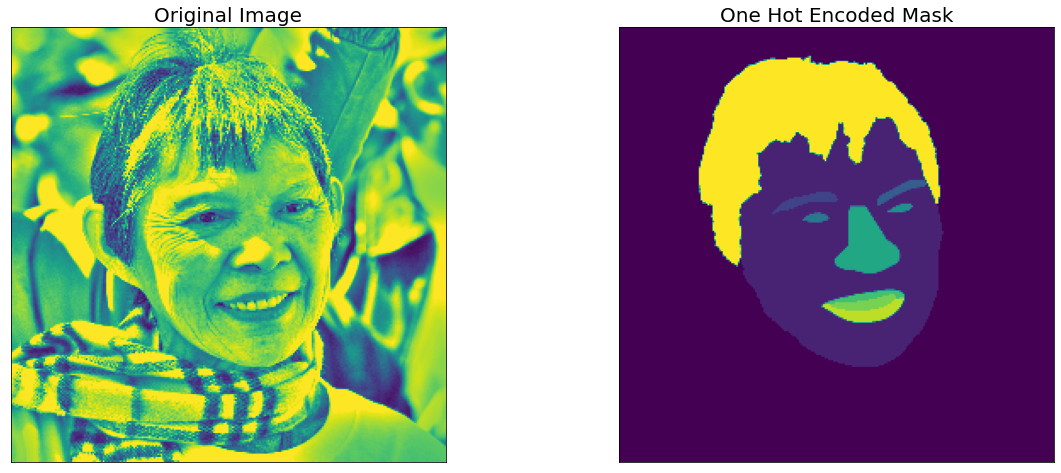

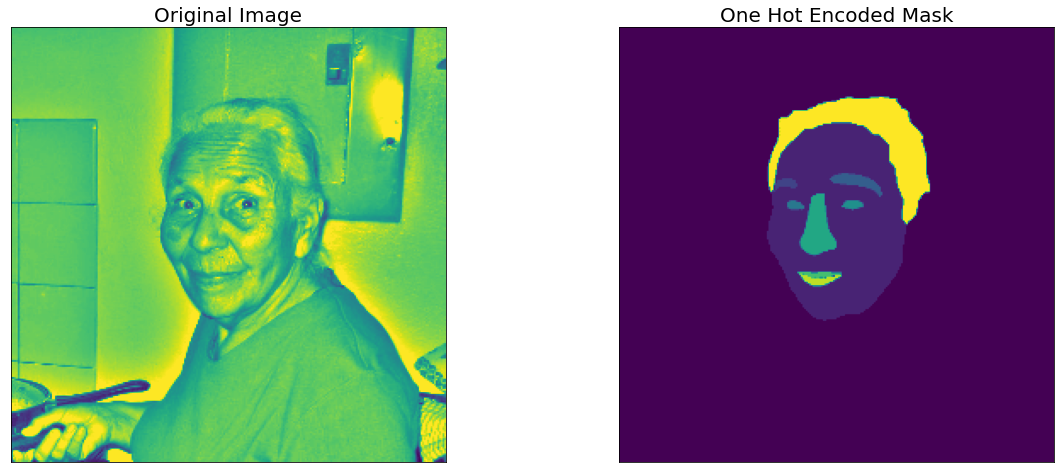

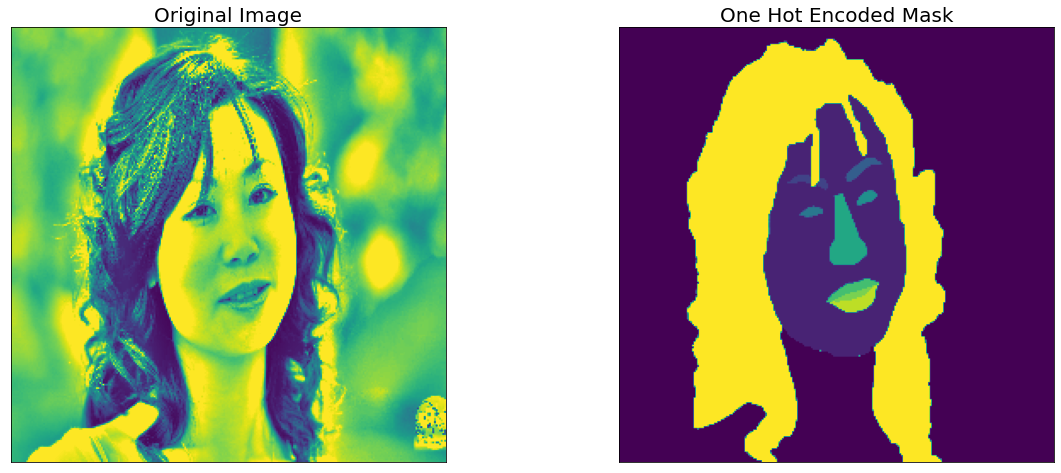

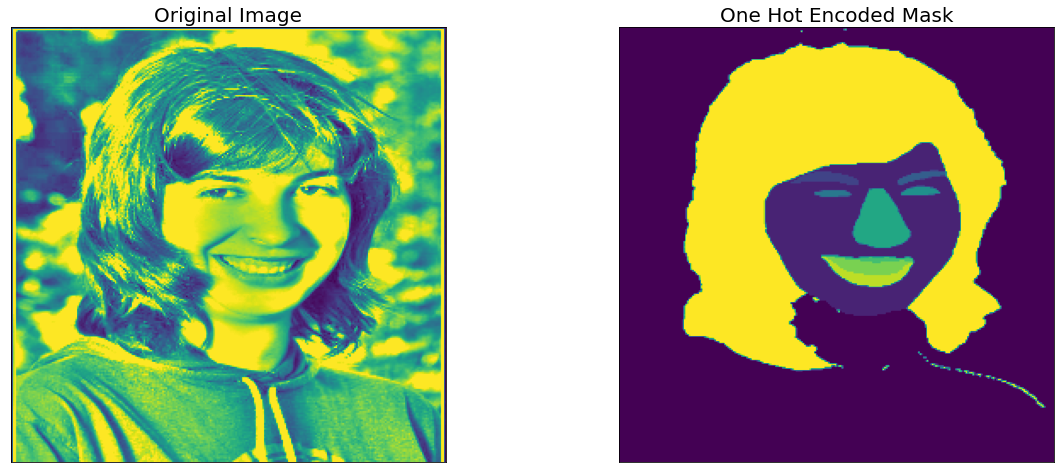

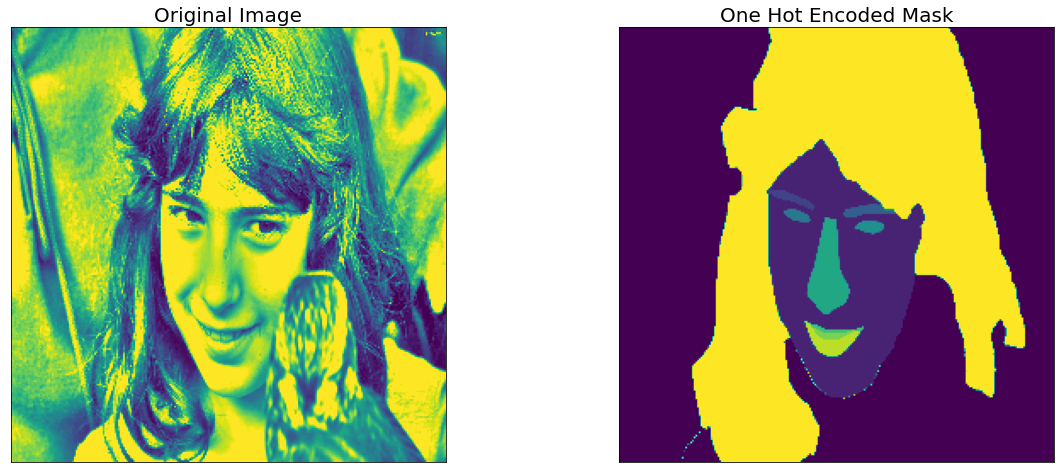

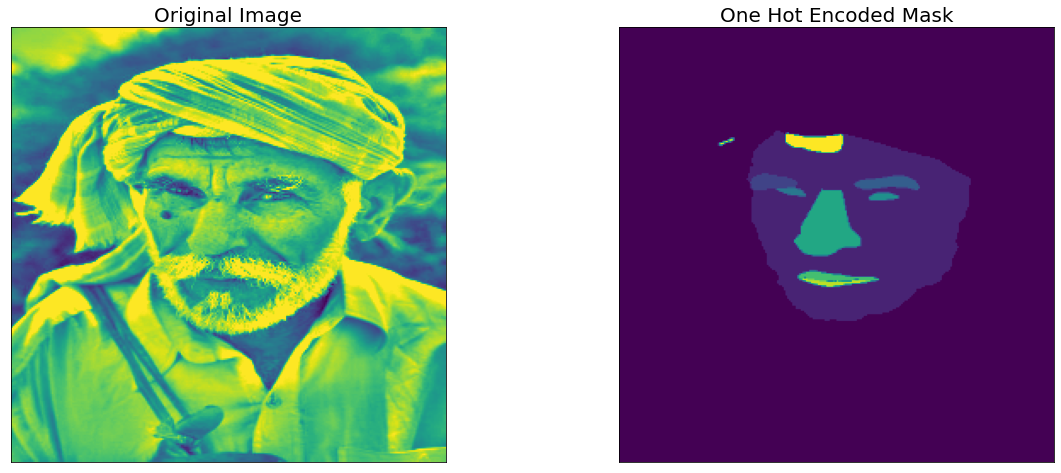

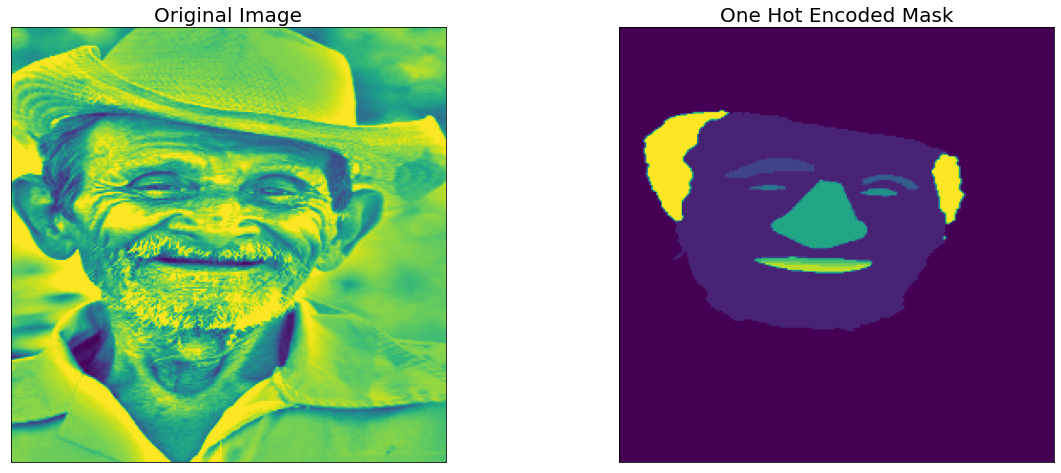

torch.Size([256, 256])

In [ ]:
for x in range(10):
  visualize(
      original_image = x_test[x][0,::],
      #ground_truth_mask = colour_code_segmentation(reverse_one_hot(y_test[0]), rgb_vals),
      one_hot_encoded_mask = reverse_one_hot(y_test[x])
  )

reverse_one_hot(y_test[0]).shape

## Dataset creation

In [ ]:
import torchvision.transforms as T
import torchvision.transforms.functional as F
import random

class MyDataSet(torch.utils.data.Dataset):
  def __init__(self, x, y):
    super(MyDataSet, self).__init__()
    
    # store the augmented tensors tensors
    self._x, self._y = x,y

  def __len__(self):
    # a DataSet must know it size
    return self._x.shape[0]

  def __getitem__(self, index):
    x = self._x[index, :]
    y = self._y[index, :]
    # print("GETTING ITEM")
    return x, y

train_ds = MyDataSet(x_train, y_train)
val_ds = MyDataSet(x_test, y_test)


### Data Loader

In [ ]:
def make_weights_for_balanced_classes(labels, nclasses=11):                        
    count = [0] * nclasses                                                      
    for item in labels:                                                         
        count[item] += 1 
                                                        
    weight_per_class = [0.] * nclasses  
    N = float(sum(count))                                                   
    for i in range(nclasses):                                                   
        weight_per_class[i] = N/float(count[i])
    return    weight_per_class 

In [ ]:
from torch.utils.data import DataLoader

# Get train and val data loaders
train_loader = DataLoader(train_ds, batch_size=5, shuffle=True, num_workers=2)
valid_loader = DataLoader(val_ds, batch_size=2, shuffle=False, num_workers=1)

print(len(train_loader))

320


### (DataLoader) Sanity check

torch.Size([1, 256, 256])
torch.Size([11, 256, 256])


<ipython-input-81-5b4e1d211dd3>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gt_mask = colour_code_segmentation(reverse_one_hot(torch.tensor(gt_mask)), rgb_vals)


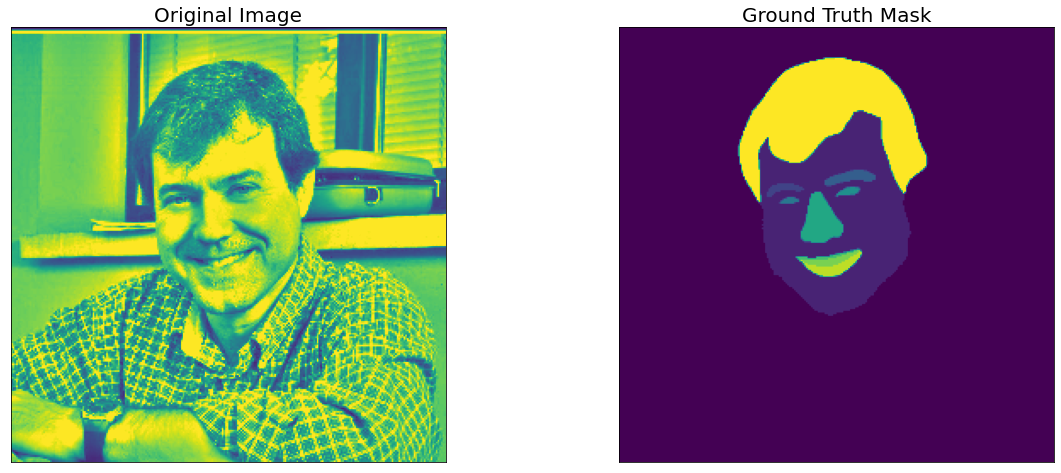

torch.Size([1, 256, 256])
torch.Size([11, 256, 256])


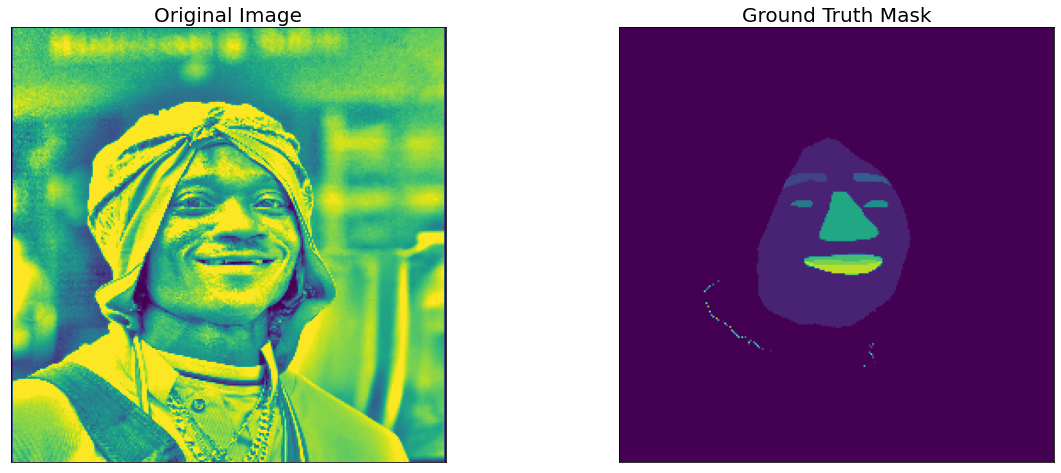

torch.Size([1, 256, 256])
torch.Size([11, 256, 256])


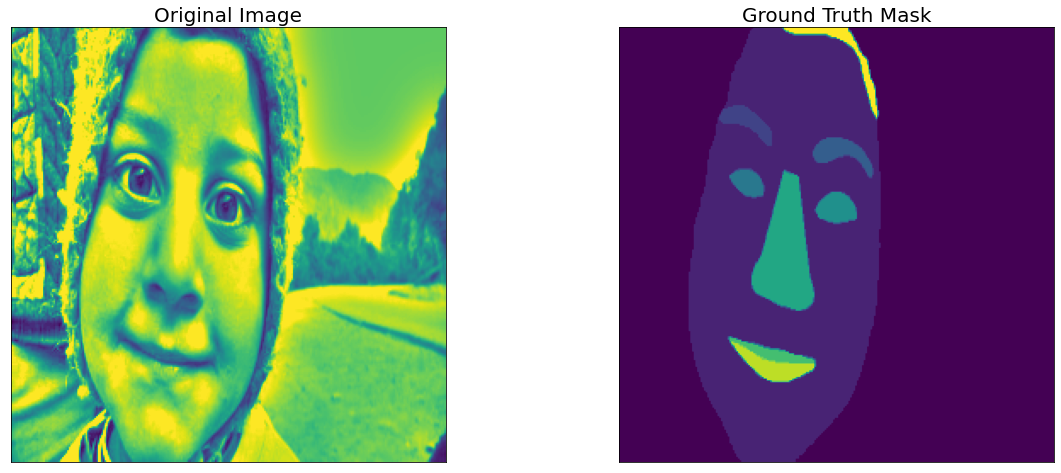

torch.Size([1, 256, 256])
torch.Size([11, 256, 256])


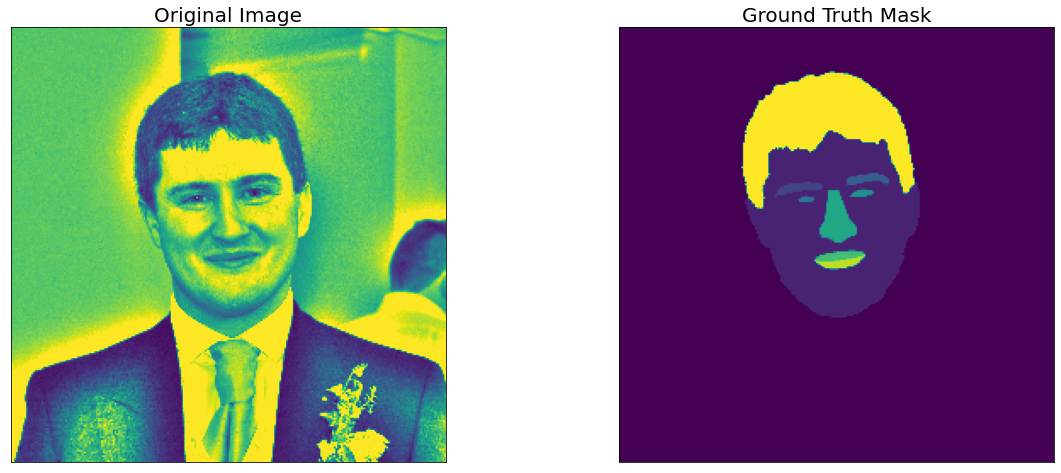

In [ ]:
for x in range(4):

    image_vis = train_ds[x][0]
    print(image_vis.shape)

    gt_mask = train_ds[x][1]
    print(gt_mask.shape)
    gt_mask = colour_code_segmentation(reverse_one_hot(torch.tensor(gt_mask)), rgb_vals)

    visualize(
        original_image = image_vis[0,::],
        ground_truth_mask = gt_mask
    )

In [ ]:
! pip install segmentation-models-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Initialise Models

In [ ]:
import segmentation_models_pytorch as smp
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights, lraspp_mobilenet_v3_large

#Hyperparamters
ENCODER = 'resnet101'
ENCODER_WEIGHTS = 'imagenet' #pretrained weighting
#CLASSES = ["background", "skin", "nose", "right_eye", "left_eye", "right_brow", "left_brow", "right_ear", "left_ear", "mouth_interior", "top_lip", "bottom_lip", "neck", "hair", "beard", "clothing", "glasses", "headwear", "facewear"]
ACTIVATION = 'softmax2d' # softmax2d for multiclass segmentation

#DEEPLABV3+
deeplab = smp.DeepLabV3Plus(
    in_channels=1,
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=num_classes, 
    activation=ACTIVATION,
)

#UNET
unet = smp.Unet(
    in_channels=1,
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=num_classes, 
    activation=ACTIVATION,
)

#LRASPP
mobile = lraspp_mobilenet_v3_large

#FCN
weights = FCN_ResNet50_Weights.DEFAULT
fcn = fcn_resnet50(weights=weights)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

In [ ]:
deeplab

DeepLabV3Plus(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequentia

In [ ]:
! pip install pytorch_toolbelt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install focal_loss_torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Hyper Parameters

In [ ]:
from segmentation_models_pytorch import utils
import os

# Set flag to train the model or not. If set to 'False', only prediction is performed (using an older model checkpoint)
TRAINING = True

# Set device: `cuda` or `cpu`
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

weights = weights=torch.tensor([0.1, 1, 1, 1, 1, 1, 0.8, 1, 0.8, 1, 0.1])
# define loss function
loss = smp.utils.losses.BCELoss()

# define evalusation metrics
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]



## Train Model

In [ ]:
import matplotlib.pyplot as plt

def train_model_synth(model, saveas, epoch):

    #clear CUDA cache
    torch.cuda.empty_cache()

    # define optimizer
    optimizer = torch.optim.Adam([ 
        dict(params=model.parameters(), lr=0.001),
    ])

    # define learning rate scheduler
    lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=1, T_mult=2, eta_min=5e-5,
    )

    #define train ecpochs w/ our hyperparams
    train_epoch = smp.utils.train.TrainEpoch(
        model, 
        loss=loss, 
        metrics=metrics, 
        optimizer=optimizer,
        device=DEVICE,
        verbose=True,
    )

    #define train ecpochs w/ our hyperparams
    valid_epoch = smp.utils.train.ValidEpoch(
        model, 
        loss=loss, 
        metrics=metrics, 
        device=DEVICE,
        verbose=True,
    )

    if TRAINING:

        best_iou_score = 0.0
        train_logs_list, valid_logs_list = [], []

        #Keep track of epoch BCE and IoU for graph plots
        epoch_count = []
        v_bce = []
        v_ious = []

        t_bce = []
        t_ious = []

        i = 0
        while i < epoch:
            i +=1 

            # Perform training & validation
            print('\nEpoch: {}'.format(i))
            train_logs = train_epoch.run(train_loader)
            valid_logs = valid_epoch.run(valid_loader)
            #log
            train_logs_list.append(train_logs)
            valid_logs_list.append(valid_logs)

            # Save model if a better val IoU score is obtained
            if best_iou_score < valid_logs['iou_score']:
                best_iou_score = valid_logs['iou_score']
                torch.save(model, saveas)
                print('Model saved!')

            # Append results to graphs:
            v_bce.append(valid_logs['bce_loss'])
            v_ious.append(valid_logs['iou_score'])
            
            t_bce.append(train_logs['bce_loss'])
            t_ious.append(train_logs['iou_score'])
            
            epoch_count.append(i)
        
            # Plot graph every 2 epochs
            if i % 2 ==0:
                plt.plot(epoch_count,t_bce, label="Train ce")
                plt.plot(epoch_count,v_bce, label="Valid ce")
                plt.legend(loc="upper left")
                plt.xlabel("Epochs")
                plt.ylabel("BCE Loss")
                plt.show()
                plt.plot(epoch_count,t_ious, label="Train IoU")
                plt.plot(epoch_count,v_ious, label="Valid IoU")
                plt.legend(loc="upper left")
                plt.xlabel("Epochs")
                plt.ylabel("IoU")
                plt.show()

'\n            # Append results to graphs:\n            v_bce.append(valid_logs[\'bce_loss\'])\n            v_ious.append(valid_logs[\'iou_score\'])\n            \n            t_bce.append(train_logs[\'bce_loss\'])\n            t_ious.append(train_logs[\'iou_score\'])\n            \n            epoch_count.append(i)\n        \n            # Plot graph every 2 epochs\n            if i % 2 ==0:\n                plt.plot(epoch_count,t_bce, label="Train ce")\n                plt.plot(epoch_count,v_bce, label="Valid ce")\n                plt.legend(loc="upper left")\n                plt.xlabel("Epochs")\n                plt.ylabel("BCE Loss")\n                plt.show()\n                plt.plot(epoch_count,t_ious, label="Train IoU")\n                plt.plot(epoch_count,v_ious, label="Valid IoU")\n                plt.legend(loc="upper left")\n                plt.xlabel("Epochs")\n                plt.ylabel("IoU")\n                plt.show()\n'

### Function to view train model precitions

In [ ]:
from sklearn.metrics import jaccard_score, f1_score
import tensorflow as tf
from torchmetrics.classification import F1Score, BinaryF1Score, MulticlassF1Score, JaccardIndex
from torchmetrics import Dice
from sklearn.preprocessing import MultiLabelBinarizer
from torchvision.utils import save_image
from PIL import Image

def average(lst):
    return sum(lst) / len(lst)

def view_predictions(model, ds, numm_classes ):

    ious = []
    f1s = []

    #predict
    for idx in range(6):

        image, gt_mask = ds[idx]
        image_vis = ds[idx][0]
        image_vis = np.transpose(image_vis,(1,2,0))
        print(image_vis.shape)
        
        x_tensor = image.to(DEVICE).unsqueeze(0)
        # Predict test image
        pred_mask = model(x_tensor)
        print("predraw", pred_mask.shape)
        print("gtraw", gt_mask.shape)
        pred_mask = pred_mask.detach().squeeze().cpu().numpy()
        # Convert pred_mask from `CHW` format to `HWC` format
        print(pred_mask.shape)
        # Get prediction channel corresponding to face
        pred_mask = colour_code_segmentation(reverse_one_hot(torch.tensor(pred_mask)), rgb_vals)
        print(pred_mask.shape)
        
        # Convert gt_mask from `CHW` format to `HWC` format
        print(gt_mask.shape)
        gt_mask = colour_code_segmentation(reverse_one_hot(torch.tensor(gt_mask)), rgb_vals)
        
        #get IoU score
        m = tf.keras.metrics.MeanIoU(num_classes=numm_classes)
        m.update_state(gt_mask, pred_mask)
        iou = m.result().numpy()
        #print("MEAN IoU:" , iou)
        ious.append(iou)

        metric = MulticlassF1Score(num_classes=numm_classes, average=None, labels=np.unique(pred_mask) ,validate_args=True)
        #metric = JaccardIndex(task="multiclass",num_classes=numm_classes, average=None, labels=np.unique(pred_mask) ,validate_args=True)
        f1 = metric(torch.tensor(pred_mask), torch.tensor(gt_mask))
        print(f1)
        if len(f1) == num_classes:
          f1s.append(np.array(f1))

        visualize(
            original_image = image_vis[:,:,0],
            ground_truth_mask = gt_mask,
            predicted_mask = pred_mask,
        )

    fs1_numpy = np.array(f1s)
   # print(fs1_numpy.type())
    av_f1s = fs1_numpy.mean(axis=0)
    av_f1s_av = av_f1s.mean(axis=0)

    print ("Dataset MIoU = ", average(ious))
    print ("Dataset F1 = ", av_f1s)
    print ("Dataset F1 av = ", av_f1s_av)

In [ ]:
from torchvision.utils import save_image
from PIL import Image

def save_predictions(model, ds, path):

    #predict
    for idx in range(len(ds)):

        # Pop image from DS
        image, gt_mask = ds[idx]
        image_vis = ds[idx][0]
        image_vis = np.transpose(image_vis,(1,2,0))
        
        # Reshape
        x_tensor = image.to(DEVICE).unsqueeze(0)
        # Predict test image
        pred_mask = model(x_tensor)
        # Reshape
        pred_mask = pred_mask.detach().squeeze().cpu()
        # Decode Onehots
        pred_mask = colour_code_segmentation(reverse_one_hot(torch.tensor(pred_mask)), rgb_vals)
        gt_mask = colour_code_segmentation(reverse_one_hot(torch.tensor(gt_mask)), rgb_vals)

        # Sanity check
        print(image_vis.shape)
        print("GT", gt_mask.shape)
        print("PRED", pred_mask.shape)

        # Save Predictions for use in Label Adapter
        im = Image.fromarray(pred_mask)
        im.save(path + str(idx) + ".png")

        im2 = Image.fromarray(gt_mask)
        im2.save(path + "seg/" + str(idx) + ".png")


#save_predictions(model, val_ds)

# Predict with Deeplabv3+

In [ ]:
train_model_synth(deeplab, "/content/drive/MyDrive/helen_deeplab_aug7.pth", 50)


Epoch: 1
valid: 100%|██████████| 200/200 [00:06<00:00, 29.84it/s, bce_loss - 0.05155, iou_score - 0.8042]
Model saved!

Epoch: 2
valid: 100%|██████████| 200/200 [00:06<00:00, 30.08it/s, bce_loss - 0.05608, iou_score - 0.8076]
Model saved!

Epoch: 3
valid: 100%|██████████| 200/200 [00:06<00:00, 29.96it/s, bce_loss - 0.04099, iou_score - 0.8479]
Model saved!

Epoch: 4
valid: 100%|██████████| 200/200 [00:06<00:00, 29.92it/s, bce_loss - 0.03931, iou_score - 0.8538]
Model saved!

Epoch: 5
valid: 100%|██████████| 200/200 [00:06<00:00, 29.91it/s, bce_loss - 0.03643, iou_score - 0.8628]
Model saved!

Epoch: 6
valid: 100%|██████████| 200/200 [00:06<00:00, 30.08it/s, bce_loss - 0.03626, iou_score - 0.8638]
Model saved!

Epoch: 7
valid: 100%|██████████| 200/200 [00:06<00:00, 30.41it/s, bce_loss - 0.04042, iou_score - 0.8478]

Epoch: 8
valid: 100%|██████████| 200/200 [00:06<00:00, 30.32it/s, bce_loss - 0.03707, iou_score - 0.8649]
Model saved!

Epoch: 9
valid: 100%|██████████| 200/200 [00:06<00:0

KeyboardInterrupt: ignored

### Load and view model predictions

torch.Size([256, 256, 1])
predraw torch.Size([1, 11, 256, 256])
gtraw torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256)
torch.Size([11, 256, 256])
tensor([0.8977, 0.8901, 0.6133, 0.7110, 0.7619, 0.8663, 0.9174, 0.7328, 0.1379,
        0.7854, 0.8038])


<ipython-input-101-40719db5ffa0>:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gt_mask = colour_code_segmentation(reverse_one_hot(torch.tensor(gt_mask)), rgb_vals)


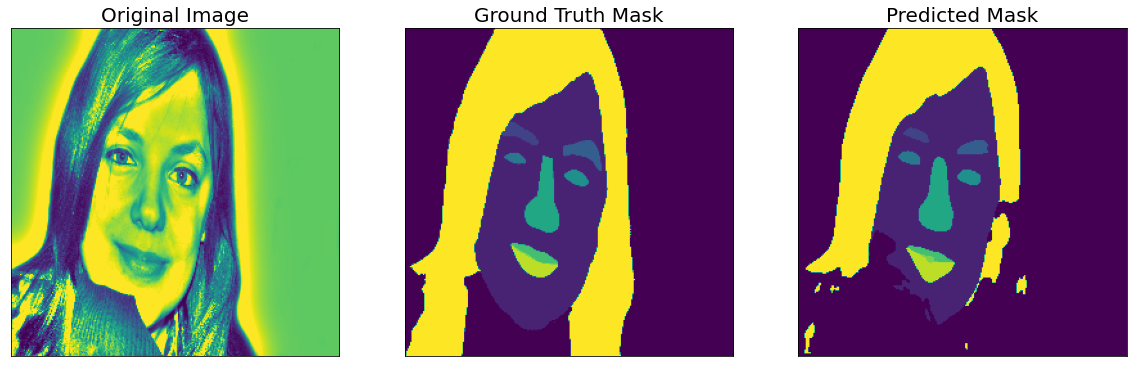

torch.Size([256, 256, 1])
predraw torch.Size([1, 11, 256, 256])
gtraw torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256)
torch.Size([11, 256, 256])
tensor([0.9937, 0.9685, 0.6090, 0.8025, 0.5388, 0.5887, 0.9570, 0.6556, 0.7520,
        0.8414, 0.9526])


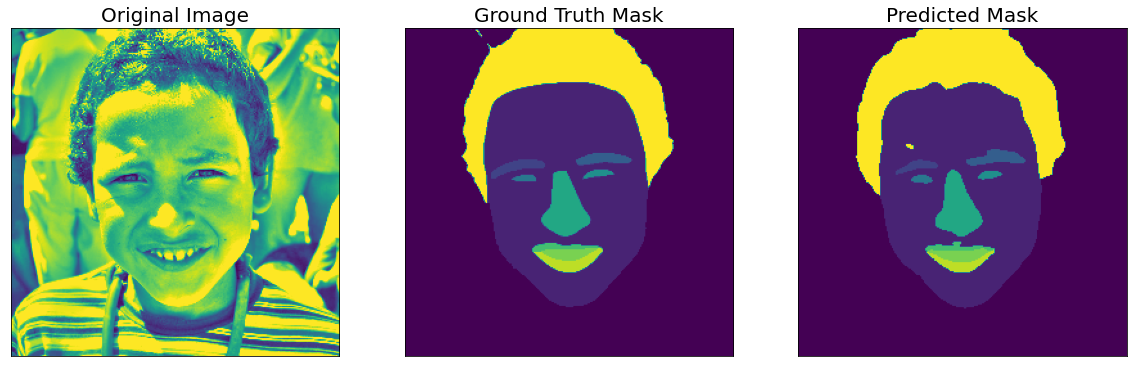

torch.Size([256, 256, 1])
predraw torch.Size([1, 11, 256, 256])
gtraw torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256)
torch.Size([11, 256, 256])
tensor([0.9944, 0.9451, 0.5753, 0.6364, 0.7532, 0.7417, 0.9028, 0.6575, 0.6184,
        0.6918, 0.9354])


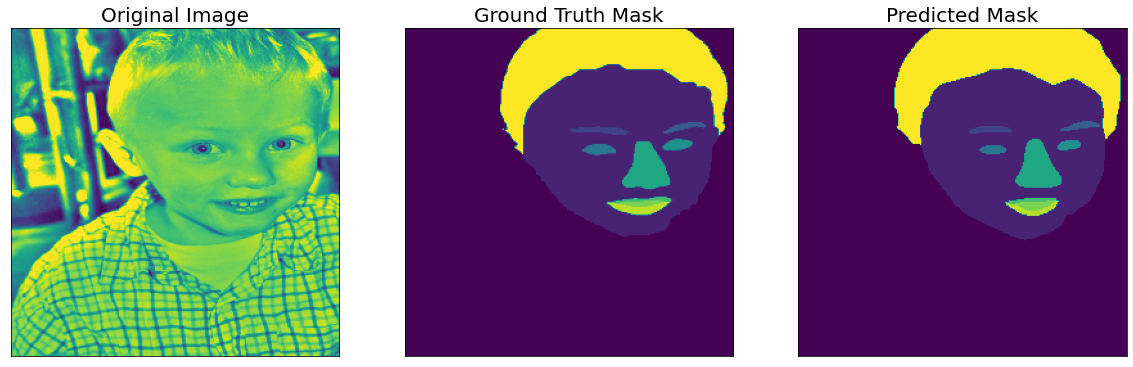

torch.Size([256, 256, 1])
predraw torch.Size([1, 11, 256, 256])
gtraw torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256)
torch.Size([11, 256, 256])
tensor([0.9858, 0.9144, 0.7657, 0.4774, 0.4416, 0.5342, 0.9266, 0.7412, 0.8409,
        0.8377, 0.8641])


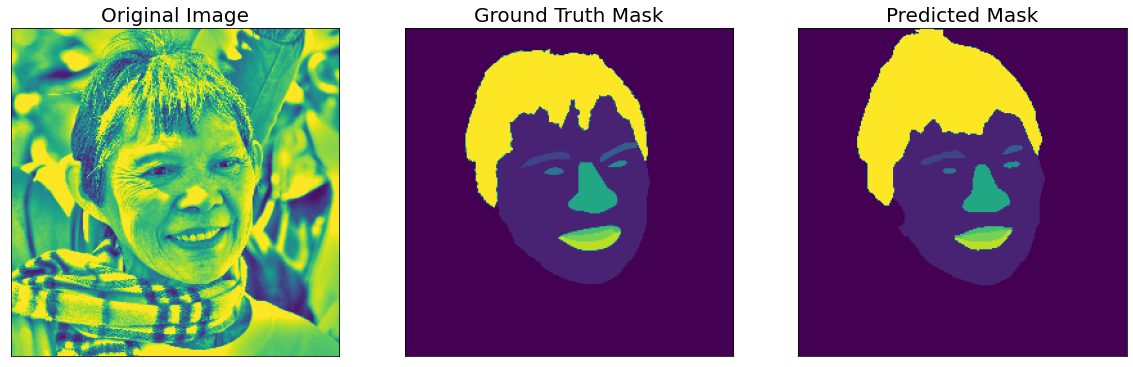

torch.Size([256, 256, 1])
predraw torch.Size([1, 11, 256, 256])
gtraw torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256)
torch.Size([11, 256, 256])
tensor([0.9960, 0.8768, 0.1692, 0.4526, 0.5469, 0.6667, 0.8879, 0.5405, 0.0000,
        0.6276, 0.7204])


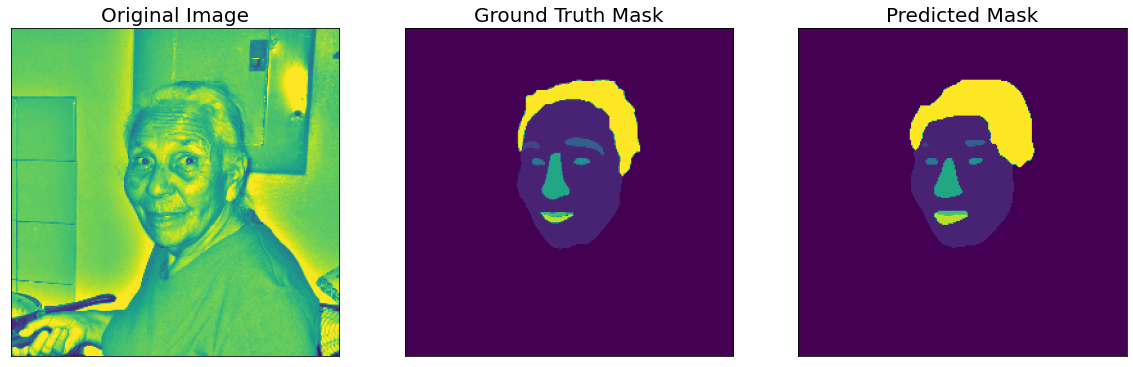

torch.Size([256, 256, 1])
predraw torch.Size([1, 11, 256, 256])
gtraw torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256)
torch.Size([11, 256, 256])
tensor([0.9698, 0.9318, 0.0000, 0.3846, 0.6308, 0.6188, 0.9255, 0.7416, 0.7514,
        0.8303, 0.9110])


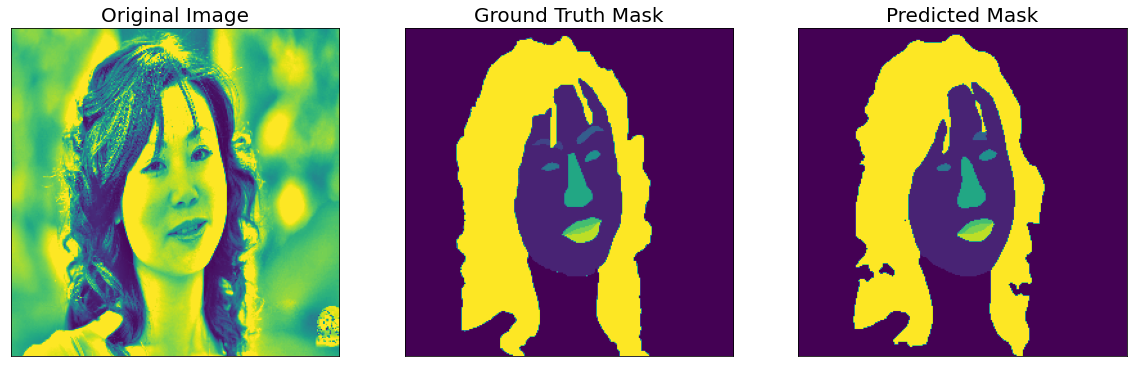

Dataset MIoU =  0.6094735066095988
Dataset F1 =  [0.97290015 0.9211142  0.45543292 0.5773972  0.61218077 0.6694072
 0.9195449  0.6782114  0.5167654  0.76902264 0.8645293 ]
Dataset F1 av =  0.7233187


In [ ]:
model = torch.load("/content/drive/MyDrive/helen_deeplab_aug7.pth", map_location=DEVICE)

view_predictions(model,val_ds, num_classes)

In [ ]:
#save_predictions(model, val_ds, "/content/drive/MyDrive/label_adapter_helen_no_aug/")

### Predict with U-net

In [ ]:
# load best saved model checkpoint from previous commit (if present)
#train_model_synth(deeplab, "/content/drive/MyDrive/helen_unet_aug.pth", 50)


In [ ]:

#load

#model = torch.load('/content/drive/MyDrive/helen_unet_aug.pth', map_location=DEVICE)
#print("model loaded")

#view_predictions(model, val_ds)

In [ ]:
#save_predictions(model, val_ds, "/content/drive/MyDrive/label_adapter_helen_unet/")

In [ ]:
num_classes

In [ ]:
rgb_vals